In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [ ]:
img1 = cv.imread('obamaface.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('obamaface2.jpg', cv.IMREAD_GRAYSCALE)

# orb finds keypoints
orb = cv.ORB_create()

# finds keypoints and descriptors

# keypoints are the same thing as interest points. 
# They are spatial locations, or points in the image that define what is interesting or what stand out in the image.

# What makes keypoints different between frameworks is the way you describe these keypoints.
# Descriptors are primarily concerned with both the scale and the orientation of the keypoint.
# but we need the descriptor part if it is our purpose to try and match between keypoints in different images
# https://stackoverflow.com/questions/29133085/what-are-keypoints-in-image-processing#:~:text=Key%2Dpoints%20should%20simply%20be,%2C%20just%20like%20%40rayryeng%20explained.

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [ ]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
 # draw 10 lines between the top 10 match points between the two pictures
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [26]:
matches = sorted(matches, key = lambda x:x.distance)
# contains match objects with attributes
# DMatch.distance - Distance between descriptors. The lower, the better it is.
# DMatch.trainIdx - Index of the descriptor in train descriptors
# DMatch.queryIdx - Index of the descriptor in query descriptors
# DMatch.imgIdx - Index of the train image.
counter = 0
for match in matches:
    counter += match.distance
print(matches[0].distance)

57.77272727272727
35.0


In [ ]:
img4 = cv.imread('asian.jpg', cv.IMREAD_GRAYSCALE)

kp4, des4 = orb.detectAndCompute(img4, None)

matches2 = bf.match(des1, des4)

matches2 = sorted(matches, key = lambda x:x.distance)

img5 = cv.drawMatches(img1,kp1,img4,kp4,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

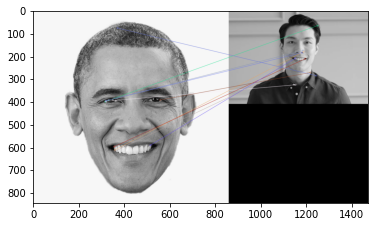

35.0


In [25]:
plt.imshow(img5),plt.show()
print(matches2[0].distance)

In [ ]:
import face_recognition